In [2]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [4]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [6]:
#hyper parameters
#Numero de muestras de todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
# numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nSamples = 10000

input_size = 38
num_classes = 12

hidden_size = 100
num_epochs = 500
batch_size = 256
learning_rate = 0.001
# learning_rate = [3e-3, 1e-2, 1e-1]   #lr tiene incremento logaritmico 10^-2 --> 0.01

num_splits = 10

nTest = 0.2

# class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#                'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car', ] 
class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
                'Up by elevator',  'Down by elevator'] 

In [7]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = data
df = df[0:nSamples]

In [8]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 10) | (df.act == 11)]
# # Elimino las muesta correpondientes a las actividades subir y bajar ascensor(10, 11)

# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

# df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [9]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 10000
[2737, 599, 1181, 1032, 698, 162, 181, 2031, 0, 752, 627, 0]


<BarContainer object of 12 artists>

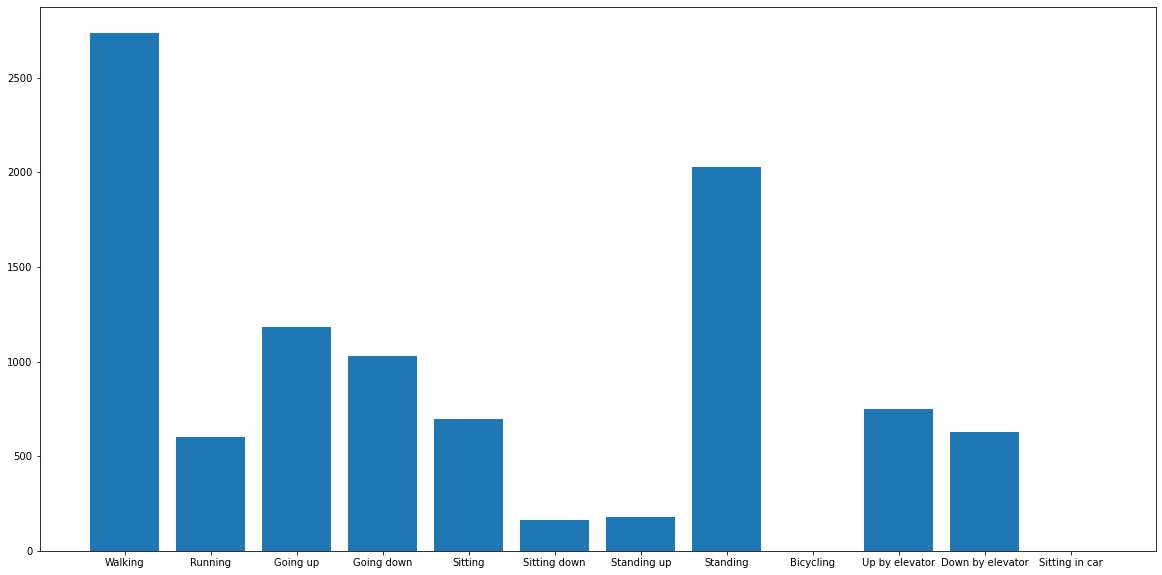

In [10]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [11]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [12]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [14]:
# modelo_pre_train = torch.jit.load('modelo_final_2021-06-05_0.8053_Test.zip')
# evaluate_aux(modelo_pre_train, test_loader)
modelo_pre_train = None

######### Launch with 10000 Samples, 500 Epochs, 256      Batch, 10 Splits, 12 Class, 100 Hidden neurons ######### 
Epochs >>>>>> 50/500  Loss train >>>>>> 1.779849350452423  loss test >>>>> 1.9854505473375321
Epochs >>>>>> 100/500  Loss train >>>>>> 1.404483139514923  loss test >>>>> 1.7961246195435523
Epochs >>>>>> 150/500  Loss train >>>>>> 1.2054387331008911  loss test >>>>> 1.6452782356739044
Epochs >>>>>> 200/500  Loss train >>>>>> 1.0867227911949158  loss test >>>>> 1.5365166041254996
Epochs >>>>>> 250/500  Loss train >>>>>> 1.002672702074051  loss test >>>>> 1.4547492411136627
Epochs >>>>>> 300/500  Loss train >>>>>> 0.9367849975824356  loss test >>>>> 1.3903787874182065
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8819311112165451  loss test >>>>> 1.3379194435903004
Epochs >>>>>> 400/500  Loss train >>>>>> 0.835170790553093  loss test >>>>> 1.2940833887457848
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7951183617115021  loss test >>>>> 1.2568930226895545
Epochs >>>>>> 500/500  Lo

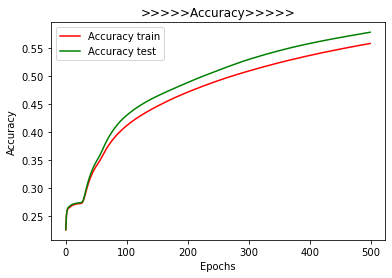

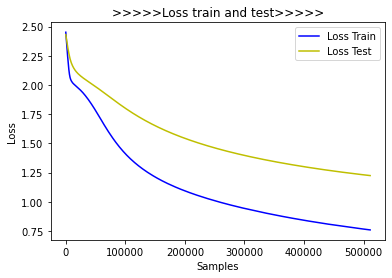

Accuracy de validación con kFold 0.681640625
Accuracy Train: 0.656375 
Accuracy Test: 0.65 
Diferencia entre train y test: 0.0063750000000000195

 


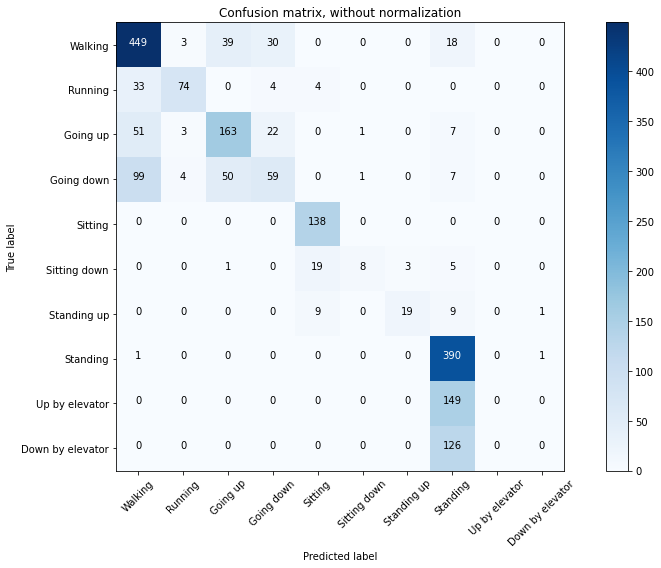

Epochs >>>>>> 50/500  Loss train >>>>>> 1.7493286430835724  loss test >>>>> 2.0107155197858813
Epochs >>>>>> 100/500  Loss train >>>>>> 1.3632049262523651  loss test >>>>> 1.8143301814794541
Epochs >>>>>> 150/500  Loss train >>>>>> 1.1648308634757996  loss test >>>>> 1.6612794836362204
Epochs >>>>>> 200/500  Loss train >>>>>> 1.0460445880889893  loss test >>>>> 1.5512387138605117
Epochs >>>>>> 250/500  Loss train >>>>>> 0.9621082544326782  loss test >>>>> 1.4686758233308792
Epochs >>>>>> 300/500  Loss train >>>>>> 0.8956400752067566  loss test >>>>> 1.4044577968120575
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8397044390439987  loss test >>>>> 1.3530307230353356
Epochs >>>>>> 400/500  Loss train >>>>>> 0.7915210127830505  loss test >>>>> 1.3108211991935967
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7496940940618515  loss test >>>>> 1.2754985273546642
Epochs >>>>>> 500/500  Loss train >>>>>> 0.7127311080694199  loss test >>>>> 1.2454818562865257


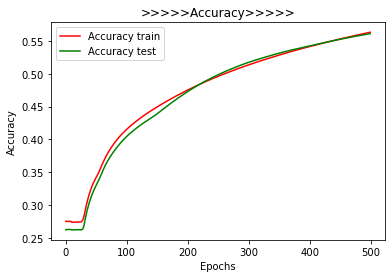

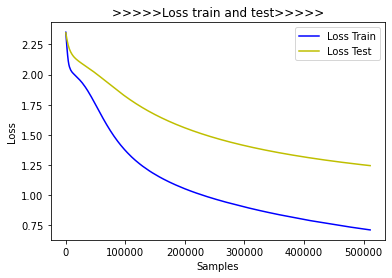

Accuracy de validación con kFold 0.6611328125
Accuracy Train: 0.662375 
Accuracy Test: 0.661 
Diferencia entre train y test: 0.001375000000000015

 


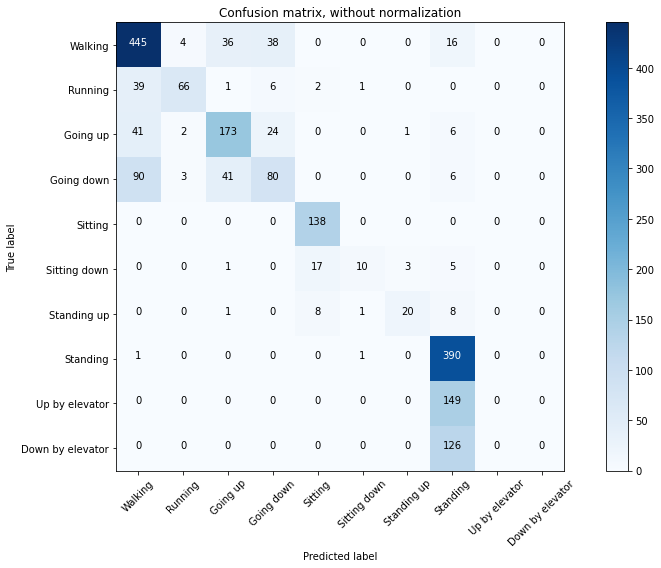

Epochs >>>>>> 50/500  Loss train >>>>>> 1.7761364579200745  loss test >>>>> 2.002252620458603
Epochs >>>>>> 100/500  Loss train >>>>>> 1.3633210957050323  loss test >>>>> 1.8027592808008195
Epochs >>>>>> 150/500  Loss train >>>>>> 1.1506344079971313  loss test >>>>> 1.6407143958409627
Epochs >>>>>> 200/500  Loss train >>>>>> 1.022394135594368  loss test >>>>> 1.5214495082199573
Epochs >>>>>> 250/500  Loss train >>>>>> 0.9313805550336838  loss test >>>>> 1.4313296033143996
Epochs >>>>>> 300/500  Loss train >>>>>> 0.8607546836137772  loss test >>>>> 1.3610019913812479
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8040895611047745  loss test >>>>> 1.3046673644014768
Epochs >>>>>> 400/500  Loss train >>>>>> 0.7572236657142639  loss test >>>>> 1.258619583249092
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7168737649917603  loss test >>>>> 1.2203995889425279
Epochs >>>>>> 500/500  Loss train >>>>>> 0.6816631108522415  loss test >>>>> 1.188221181243658


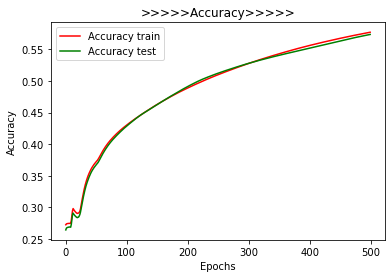

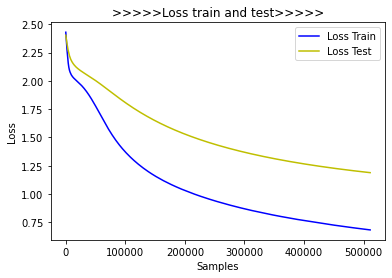

Accuracy de validación con kFold 0.6637369791666666
Accuracy Train: 0.66725 
Accuracy Test: 0.6495 
Diferencia entre train y test: 0.017750000000000044

 


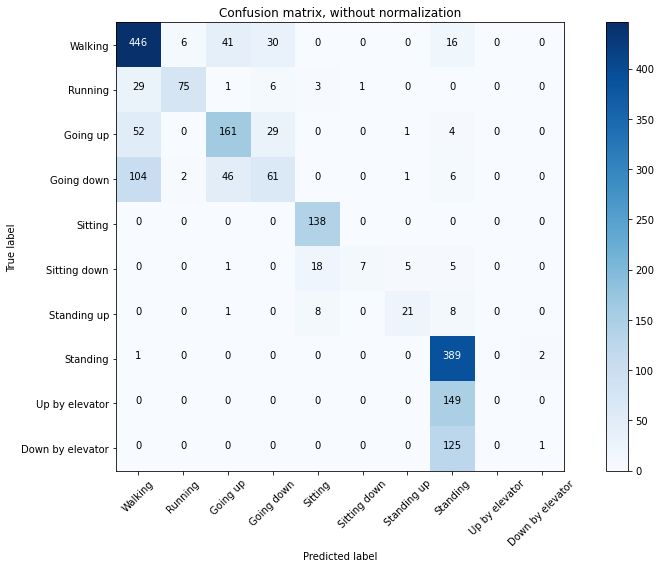

Epochs >>>>>> 50/500  Loss train >>>>>> 1.7758226990699768  loss test >>>>> 1.978302862048149
Epochs >>>>>> 100/500  Loss train >>>>>> 1.38968425989151  loss test >>>>> 1.788918897807598
Epochs >>>>>> 150/500  Loss train >>>>>> 1.192726731300354  loss test >>>>> 1.647873884042104
Epochs >>>>>> 200/500  Loss train >>>>>> 1.071288675069809  loss test >>>>> 1.5487313331663608
Epochs >>>>>> 250/500  Loss train >>>>>> 0.9835302382707596  loss test >>>>> 1.4743234384059907
Epochs >>>>>> 300/500  Loss train >>>>>> 0.9135808199644089  loss test >>>>> 1.4153229661782583
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8562223315238953  loss test >>>>> 1.3667035643117769
Epochs >>>>>> 400/500  Loss train >>>>>> 0.8081191629171371  loss test >>>>> 1.3257591173797847
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7671201229095459  loss test >>>>> 1.2908276911907726
Epochs >>>>>> 500/500  Loss train >>>>>> 0.7316908985376358  loss test >>>>> 1.2606177001595498


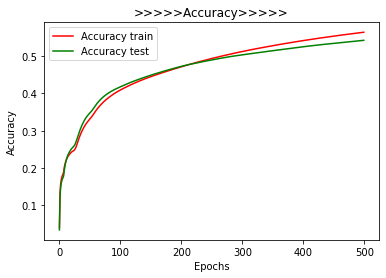

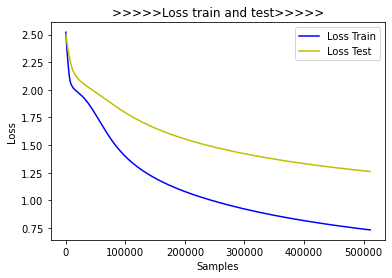

Accuracy de validación con kFold 0.654296875
Accuracy Train: 0.66025 
Accuracy Test: 0.6535 
Diferencia entre train y test: 0.006750000000000034

 


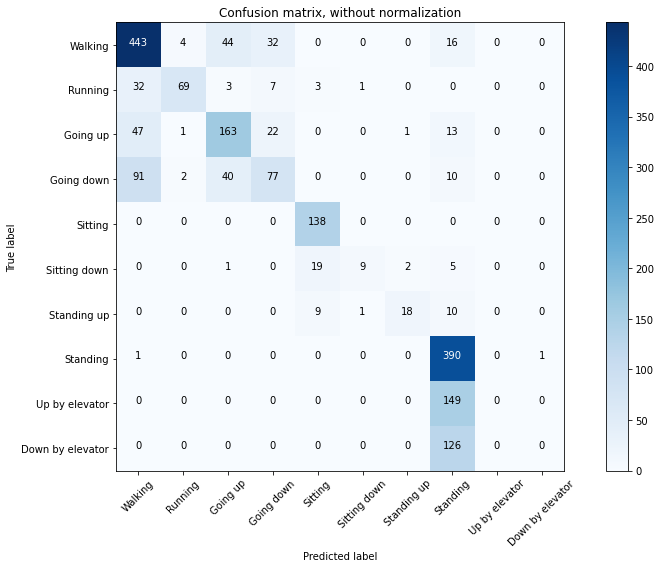

Epochs >>>>>> 50/500  Loss train >>>>>> 1.7489226460456848  loss test >>>>> 2.0017065447568894
Epochs >>>>>> 100/500  Loss train >>>>>> 1.3734564185142517  loss test >>>>> 1.7973345962166787
Epochs >>>>>> 150/500  Loss train >>>>>> 1.179970145225525  loss test >>>>> 1.6474360768000285
Epochs >>>>>> 200/500  Loss train >>>>>> 1.0573312640190125  loss test >>>>> 1.5385622888803483
Epochs >>>>>> 250/500  Loss train >>>>>> 0.9697059839963913  loss test >>>>> 1.4551188564300537
Epochs >>>>>> 300/500  Loss train >>>>>> 0.901351273059845  loss test >>>>> 1.3891738785306613
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8438424319028854  loss test >>>>> 1.335483302261148
Epochs >>>>>> 400/500  Loss train >>>>>> 0.7935904711484909  loss test >>>>> 1.2906369302421807
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7498744875192642  loss test >>>>> 1.2524046496881378
Epochs >>>>>> 500/500  Loss train >>>>>> 0.7118148803710938  loss test >>>>> 1.2193659498095513


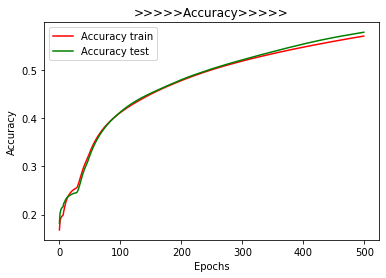

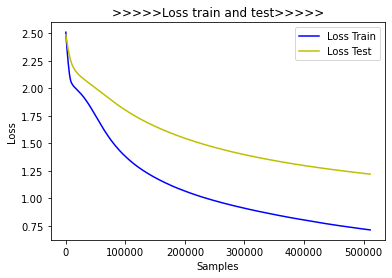

Accuracy de validación con kFold 0.6603515625
Accuracy Train: 0.67425 
Accuracy Test: 0.669 
Diferencia entre train y test: 0.005249999999999977

 


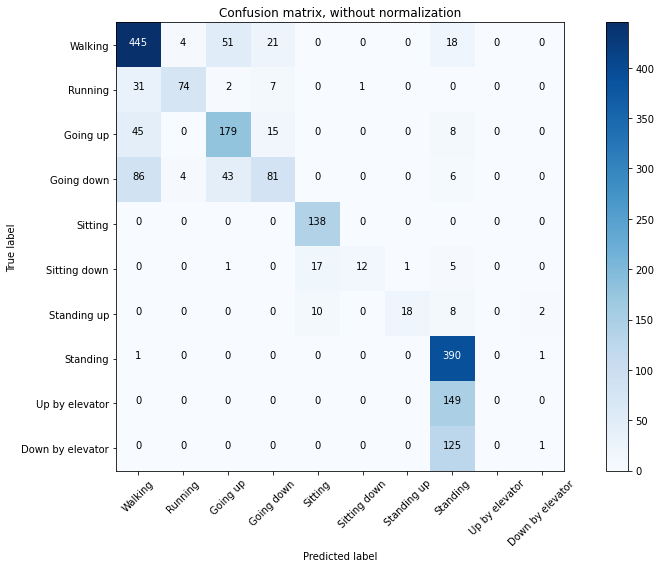

Epochs >>>>>> 50/500  Loss train >>>>>> 1.8051742613315582  loss test >>>>> 1.985222533941269
Epochs >>>>>> 100/500  Loss train >>>>>> 1.4070505201816559  loss test >>>>> 1.8049297535419464
Epochs >>>>>> 150/500  Loss train >>>>>> 1.1841729581356049  loss test >>>>> 1.650804186463356
Epochs >>>>>> 200/500  Loss train >>>>>> 1.0565333366394043  loss test >>>>> 1.5382537756860257
Epochs >>>>>> 250/500  Loss train >>>>>> 0.966073602437973  loss test >>>>> 1.453269019782543
Epochs >>>>>> 300/500  Loss train >>>>>> 0.8938223272562027  loss test >>>>> 1.3860584943989913
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8334135413169861  loss test >>>>> 1.3309126916102
Epochs >>>>>> 400/500  Loss train >>>>>> 0.7809184193611145  loss test >>>>> 1.28472847096622
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7357401102781296  loss test >>>>> 1.2452807127104866
Epochs >>>>>> 500/500  Loss train >>>>>> 0.6975710839033127  loss test >>>>> 1.2112350763082504


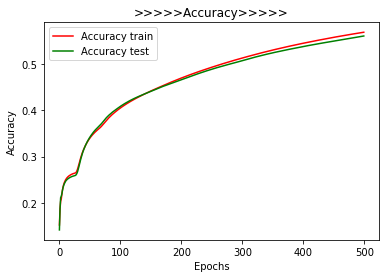

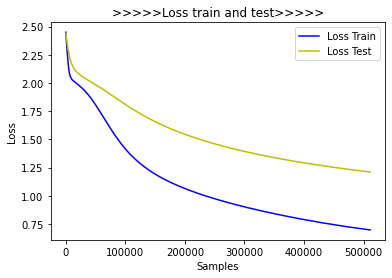

Accuracy de validación con kFold 0.6617838541666666
Accuracy Train: 0.672375 
Accuracy Test: 0.6625 
Diferencia entre train y test: 0.009874999999999967

 


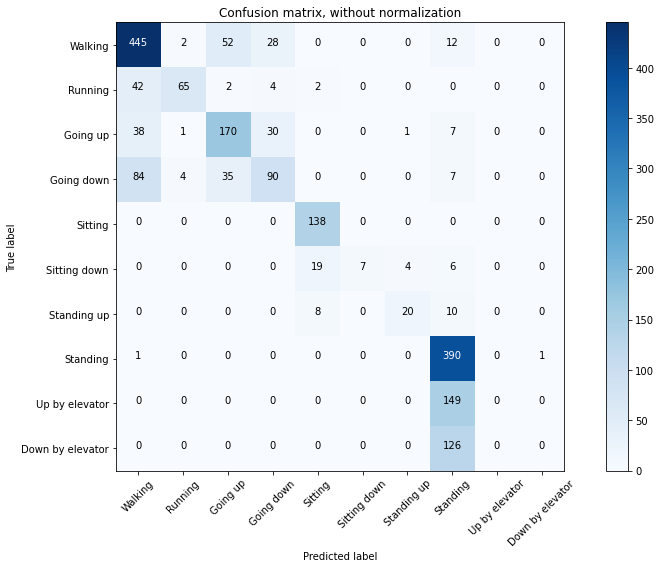

Epochs >>>>>> 50/500  Loss train >>>>>> 1.80008465051651  loss test >>>>> 2.006944229602814
Epochs >>>>>> 100/500  Loss train >>>>>> 1.4256086945533752  loss test >>>>> 1.8343808138370514
Epochs >>>>>> 150/500  Loss train >>>>>> 1.2135392725467682  loss test >>>>> 1.6895323383808136
Epochs >>>>>> 200/500  Loss train >>>>>> 1.09131920337677  loss test >>>>> 1.5828254328668117
Epochs >>>>>> 250/500  Loss train >>>>>> 1.0063682794570923  loss test >>>>> 1.5023545118570327
Epochs >>>>>> 300/500  Loss train >>>>>> 0.9379401355981827  loss test >>>>> 1.4387675616145135
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8790544867515564  loss test >>>>> 1.386493114233017
Epochs >>>>>> 400/500  Loss train >>>>>> 0.8273685723543167  loss test >>>>> 1.3422211774811148
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7814216166734695  loss test >>>>> 1.3039748213026259
Epochs >>>>>> 500/500  Loss train >>>>>> 0.7416409701108932  loss test >>>>> 1.270472730278969


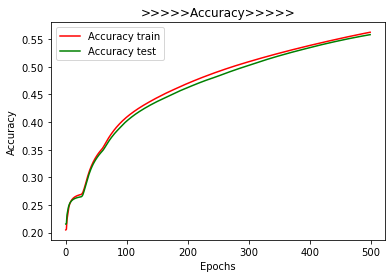

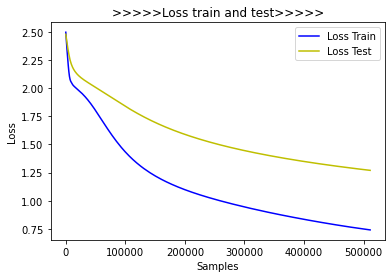

Accuracy de validación con kFold 0.6605747767857143
Accuracy Train: 0.6665 
Accuracy Test: 0.6615 
Diferencia entre train y test: 0.0050000000000000044

 


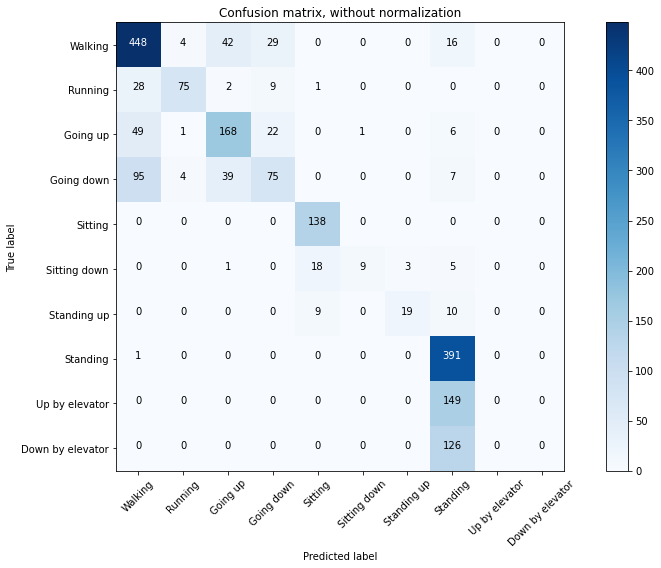

Epochs >>>>>> 50/500  Loss train >>>>>> 1.7916671931743622  loss test >>>>> 2.0312535583972933
Epochs >>>>>> 100/500  Loss train >>>>>> 1.3915349245071411  loss test >>>>> 1.8495731061697007
Epochs >>>>>> 150/500  Loss train >>>>>> 1.184911847114563  loss test >>>>> 1.7025929540395737
Epochs >>>>>> 200/500  Loss train >>>>>> 1.0660319924354553  loss test >>>>> 1.5967421269416808
Epochs >>>>>> 250/500  Loss train >>>>>> 0.9784668684005737  loss test >>>>> 1.5166413415670394
Epochs >>>>>> 300/500  Loss train >>>>>> 0.9033875018358231  loss test >>>>> 1.452842947045962
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8396163731813431  loss test >>>>> 1.4003496956825257
Epochs >>>>>> 400/500  Loss train >>>>>> 0.7862813174724579  loss test >>>>> 1.3567020878568292
Epochs >>>>>> 450/500  Loss train >>>>>> 0.740933433175087  loss test >>>>> 1.320047309630447
Epochs >>>>>> 500/500  Loss train >>>>>> 0.7022343724966049  loss test >>>>> 1.2889952575564385


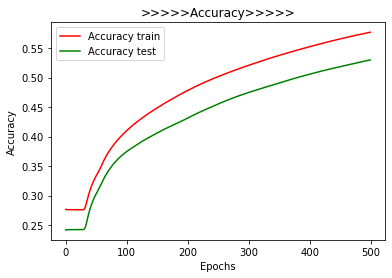

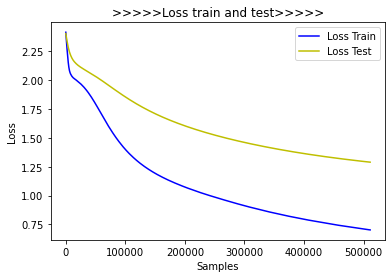

Accuracy de validación con kFold 0.657958984375
Accuracy Train: 0.67975 
Accuracy Test: 0.6645 
Diferencia entre train y test: 0.015249999999999986

 


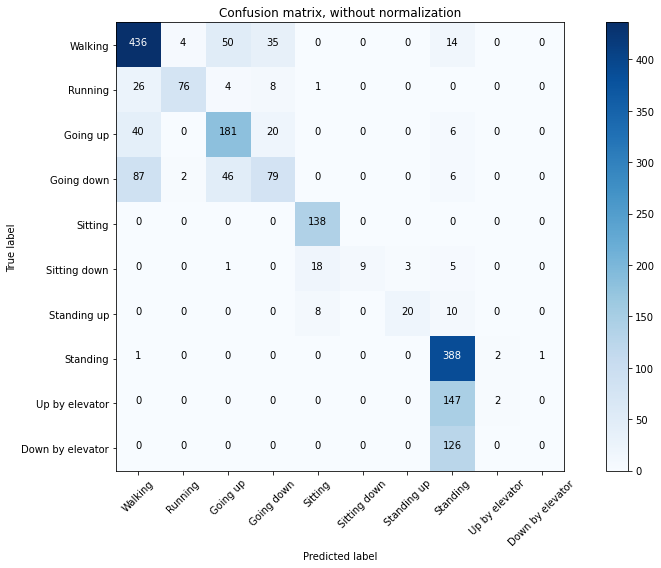

Epochs >>>>>> 50/500  Loss train >>>>>> 1.736344575881958  loss test >>>>> 2.0331445968151094
Epochs >>>>>> 100/500  Loss train >>>>>> 1.3351916670799255  loss test >>>>> 1.8278943026065826
Epochs >>>>>> 150/500  Loss train >>>>>> 1.1416596472263336  loss test >>>>> 1.6744032587607702
Epochs >>>>>> 200/500  Loss train >>>>>> 1.0244764983654022  loss test >>>>> 1.5675881768763065
Epochs >>>>>> 250/500  Loss train >>>>>> 0.9366283267736435  loss test >>>>> 1.4883694665431977
Epochs >>>>>> 300/500  Loss train >>>>>> 0.8661763370037079  loss test >>>>> 1.4264234864711762
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8084434866905212  loss test >>>>> 1.3763195421014514
Epochs >>>>>> 400/500  Loss train >>>>>> 0.7594206929206848  loss test >>>>> 1.334830023162067
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7178162783384323  loss test >>>>> 1.2999496458305253
Epochs >>>>>> 500/500  Loss train >>>>>> 0.6826009154319763  loss test >>>>> 1.2703315522670746


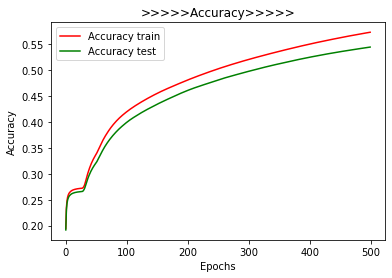

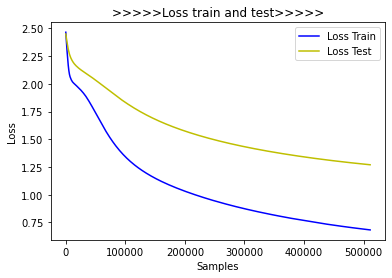

Accuracy de validación con kFold 0.6553819444444444
Accuracy Train: 0.668875 
Accuracy Test: 0.6575 
Diferencia entre train y test: 0.011375000000000024

 


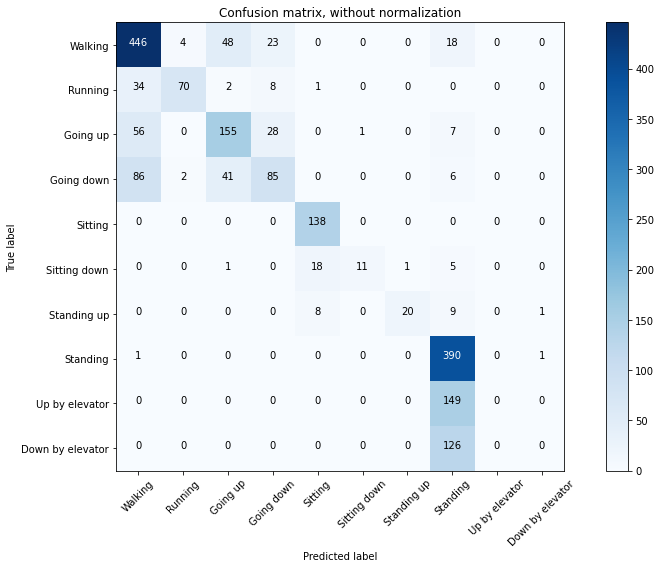

Epochs >>>>>> 50/500  Loss train >>>>>> 1.8061220347881317  loss test >>>>> 2.0368595904111864
Epochs >>>>>> 100/500  Loss train >>>>>> 1.4249180555343628  loss test >>>>> 1.8556990578770638
Epochs >>>>>> 150/500  Loss train >>>>>> 1.2039860486984253  loss test >>>>> 1.70889464199543
Epochs >>>>>> 200/500  Loss train >>>>>> 1.0795699954032898  loss test >>>>> 1.6033638951182365
Epochs >>>>>> 250/500  Loss train >>>>>> 0.9960030317306519  loss test >>>>> 1.524078019618988
Epochs >>>>>> 300/500  Loss train >>>>>> 0.9318961501121521  loss test >>>>> 1.4612406853338082
Epochs >>>>>> 350/500  Loss train >>>>>> 0.8786391764879227  loss test >>>>> 1.4096266666054726
Epochs >>>>>> 400/500  Loss train >>>>>> 0.8330532312393188  loss test >>>>> 1.3661434204503893
Epochs >>>>>> 450/500  Loss train >>>>>> 0.7930576205253601  loss test >>>>> 1.3287032836344508
Epochs >>>>>> 500/500  Loss train >>>>>> 0.756995752453804  loss test >>>>> 1.2958733784556389


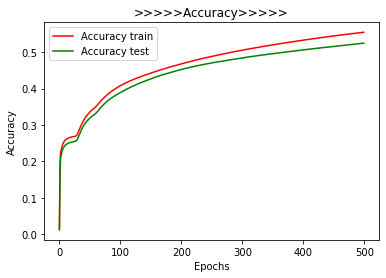

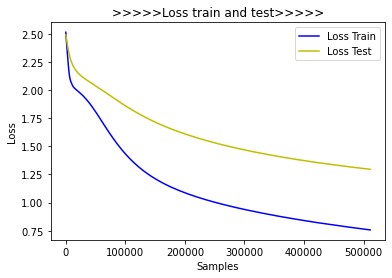

Accuracy de validación con kFold 0.65224609375
Accuracy Train: 0.652125 
Accuracy Test: 0.6405 
Diferencia entre train y test: 0.011624999999999996

 


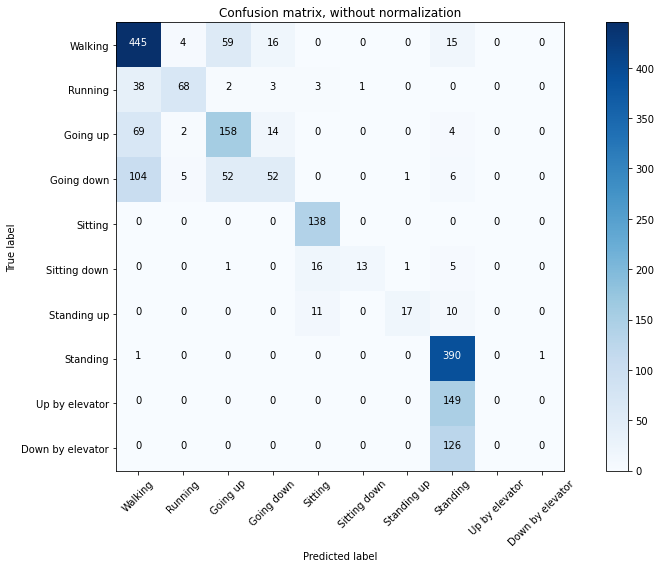

In [15]:
print(f'\033[1;36m######### Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size}\
      Batch, {num_splits} Splits, {num_classes} Class, {hidden_size} Hidden neurons ######### \033[0;m')
#  Llamo al metodo que implementa el K-fold
time_mean, modelo_trained, loss_test_list, list_test_acc = Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                               y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                               learning_rate, (X_test, y_test), modelo_pre_train)

In [16]:
# Muestro el tiempo medio del entrenamiento de mi red neuronal 
if(time_mean> 3600):
    print(f'\nTime: {int(time_mean/3600)}h {int((time_mean%3600)/60)}m {round((time_mean%3600)%60)}s')
elif(time_mean> 60):
    print(f'\nTime: {int(time_mean /60)}m {time_mean%60}s')
else:
    print(f'\nTime: {time_mean}')



Time: 25m 0.90625s


In [17]:
# Calacular el accuracy de test con un conjunto nunca antes visto 
d = data[800000:900000]

# d = d[(d.act == 1) | (d.act == 2) | (d.act == 3) | (d.act == 4) | (d.act == 5) | (d.act == 6) | (d.act == 7) 
#         | (d.act == 8) | (d.act == 9) | (d.act == 12)]

X_t = d.drop(['act'], axis = 'columns')
y_t = d.act

Xt_tensor = torch.tensor(X_t.values).cuda()

yt_tensor = torch.tensor(y_t.values).cuda()

testset = torch.utils.data.TensorDataset(Xt_tensor,  yt_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

accuracy_test = Modulo_MLP.evaluate(modelo_trained.to(device),test_loader)
print(f'Accuracy de test {accuracy_test}')


# #Guardo el modelo con el accuracy de tes
# # Scripting load
# acc_label = evaluate_aux(modelo_trained.to(device), test_loader)
# scripted_model_final = torch.jit.script(modelo_trained.cpu())
# # Scripting save
# from datetime import datetime
# now = datetime.now()
# scripted_model_final.save('modelo_final_'+str(now.date())+'_'+str(round(acc_label, 4))+'_Test'+'.zip')

Accuracy de test 0.6677449648337597


In [18]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()